In [13]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, to_hex
from matplotlib import cm

import seaborn as sns
%matplotlib inline

import random
import pandas as pd
import numpy as np

import pickle

In [2]:
mrcas = {
            'DENV1': 2970,
            'DENV2': 617, 
            'DENV3': 2152,
            'DENV4':1}

mrcas['DENV1_I'] = 4128
mrcas['DENV1_II'] = 3679
mrcas['DENV1_IV'] = 3687
mrcas['DENV1_V'] = 2975

mrcas['DENV3_I'] = 2333
mrcas['DENV3_II'] = [2215, 2205, 2195, 2180, 2165, 2172, 2155]
mrcas['DENV3_III'] = 2504
mrcas['DENV3_V'] = 2322

mrcas['DENV4_I'] = 34
mrcas['DENV4_II'] = 163
mrcas['DENV4_III'] = 6

mrcas['DENV2_AMERICAN'] = 631
mrcas['DENV2_ASIANII'] = 1368
mrcas['DENV2_COSMOPOLITAN'] = 739
mrcas['DENV2_ASIANI'] = 1423
mrcas['DENV2_ASIANAMERICAN'] = 1637

clade_name = {}
for name, clades in mrcas.items():
    if type(clades)==int:
        clade_name[clades] = name
    else:
        clade_name.update({ clade: name for clade in clades})
pickle.dump(clade_name, open('./names.p', 'wb'))

In [26]:
colors = { 
'cmap': 'viridis',
'DENV1': '#fc8d62',
'DENV2': '#8da0cb',
'DENV3': '#b2d475',
'DENV4': '#ffd92f',
    
'all_effects': '#44aaaa',
'interserotype_effects': '#dd77aa'
}

genotypes = { s : [ g for g in clade_name.values() if g.startswith(s) and len(g) > 5] for s in ['DENV1', 'DENV2', 'DENV3', 'DENV4'] }
serotype_cmaps = [cm.Blues, cm.Greens, cm.Purples, cm.Reds]

serotypes = ['DENV1', 'DENV2', 'DENV3', 'DENV4']
for i, serotype in enumerate(serotypes):    
    cmap = serotype_cmaps[i]
    colors[serotype] = cmap(.5)
    geno = sorted(genotypes[serotype])
    cm_subsection = np.linspace(0.25, 0.75,len(geno))
    color_vals = [ cmap(g) for g in cm_subsection]
    colors.update({g:color for (g,color) in zip(geno, color_vals)})




# genotypes = { s : [ g for g in clade_name.values() if g.startswith(s) and len(g) > 5] for s in ['DENV1', 'DENV2', 'DENV3', 'DENV4'] }

# for serotype, gt in genotypes.items():
#     start_color = colors[serotype]
#     palette = sns.light_palette(start_color, n_colors=len(gt)+3)
#     palette += sns.dark_palette(start_color, n_colors=len(gt), reverse=True)
#     palette = palette[:-2]
#     palette = palette[::2]
#     sns.palplot(palette)
#     middle_idx = int(len(palette)/2)
#     palette = palette[middle_idx-len(gt)/2 : middle_idx+len(gt)/2+1]
    
#     for g, c in zip(sorted(gt), palette):
#         colors[g] = c

pickle.dump(colors, open('./colors.p', 'wb'))

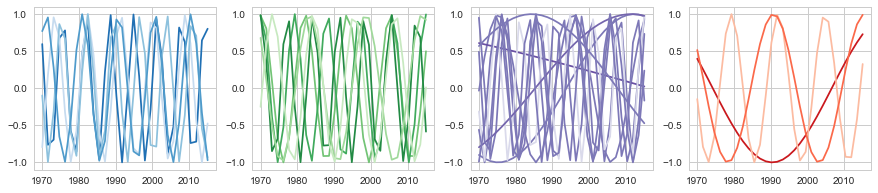

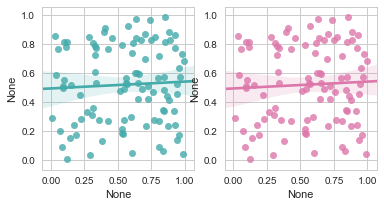

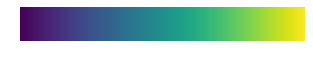

In [27]:
## Demo serotype colors
fig, axes = plt.subplots(1,4, figsize=(15,3))


for serotype, ax in zip(['DENV1', 'DENV2', 'DENV3', 'DENV4'], axes.flatten()):
    gt = genotypes[serotype]
    for g in gt:
        x = pd.Series(np.linspace(1970, 2015, 30))
        factor=random.random()
        y = pd.Series([np.sin(xi*factor) for xi in x])
        ax.plot(x,y,c=colors[g])

plt.show()

## Demo all-effects vs. interserotype-effects colors
x = pd.Series([random.random() for x in range(100)])
y = pd.Series([random.random() for y in range(100)])

sns.set(style='whitegrid')

fig, axes = plt.subplots(1,2, figsize=(6,3))
sns.regplot(x,y,color=colors['all_effects'], ax=axes[0])
sns.regplot(x,y, color=colors['interserotype_effects'], ax=axes[1])
plt.show()


## Demo titer cmap
fig, ax = plt.subplots(1, figsize=(5,0.5))
fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(colors['cmap']))
ax.set_axis_off()
plt.show()

